In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import date
from scipy.optimize import curve_fit

In [3]:
def plot_data(df):   
    max_range = 200
    data = df.to_numpy()   
    
    fig, axs = plt.subplots(5,1, figsize=(15,25))
    st = fig.suptitle("Data plotted on", fontsize="x-large")
    axs[0].plot(data[:,0], data[:,4]*1e6, label = "Integerated mass mg")
    axs[0].plot(data[:,0], data[:,5]*1e6, label = "GT Mass mg")   
    axs[0].set_xlabel("Time in seconds")
    axs[0].set_ylabel("Mass in mg")
    axs[0].set_title("Integrated mass vs GT mass vs Desired Mass")
    axs[0].legend()

    axs[1].plot(data[:,0], data[:,1], label = "Measured flow Value(l/min)")
    axs[1].set_xlabel("Time in seconds")
    axs[1].set_ylabel("Volume flow rate in l/min")
    axs[1].set_title("Measured value of the flow rate")
    axs[1].legend()

    axs[2].plot(data[:,0], data[:,4], label = "Pressure in kPa")
    axs[2].set_xlabel("Time in seconds")
    axs[2].set_ylabel("Pressure in kPa")
    axs[2].set_title("Measured pressure")
    axs[2].legend()
    
    axs[3].plot(data[:,2], data[:,1], label = "Set Voltage")
    axs[3].set_xlabel("Voltage in Volts")
    axs[3].set_ylabel("Flow in l/min")
    axs[3].set_title("Set Voltage vs Measured Flow")
    axs[3].legend()
    
    axs[4].plot(data[:,-1]*1000, data[:,1], label = "Set Current")
    axs[4].set_xlabel("Set Current in mA")
    axs[4].set_ylabel("Flow in l/min")
    axs[4].set_title("Set Current vs Measured Flow")
    axs[4].legend()   
    
    
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)

    plt.show()

In [4]:
def plot_csv(file_path,del_t):
    mass_error = []
    time_delay = []
    time_delay.append(del_t)
    print("Data from time delay of", del_t," s\n\n")
    s = str(del_t)
    
    

    header_names = ['Time', 'Actual flow Value' , 'Set Voltage', 'Pressure', 'Mass', 'Ground Truth Mass', 'Sense Current']
    df = pd.read_csv(file_path, names = header_names)
    plot_data(df)
    
    data_ = df.to_numpy()
    
    flow_indexes = np.where(data_[:,1]>0.02)
    print('Flow starts at this voltage: ',data_[flow_indexes[0][0],2])

Data from time delay of 0.5  s




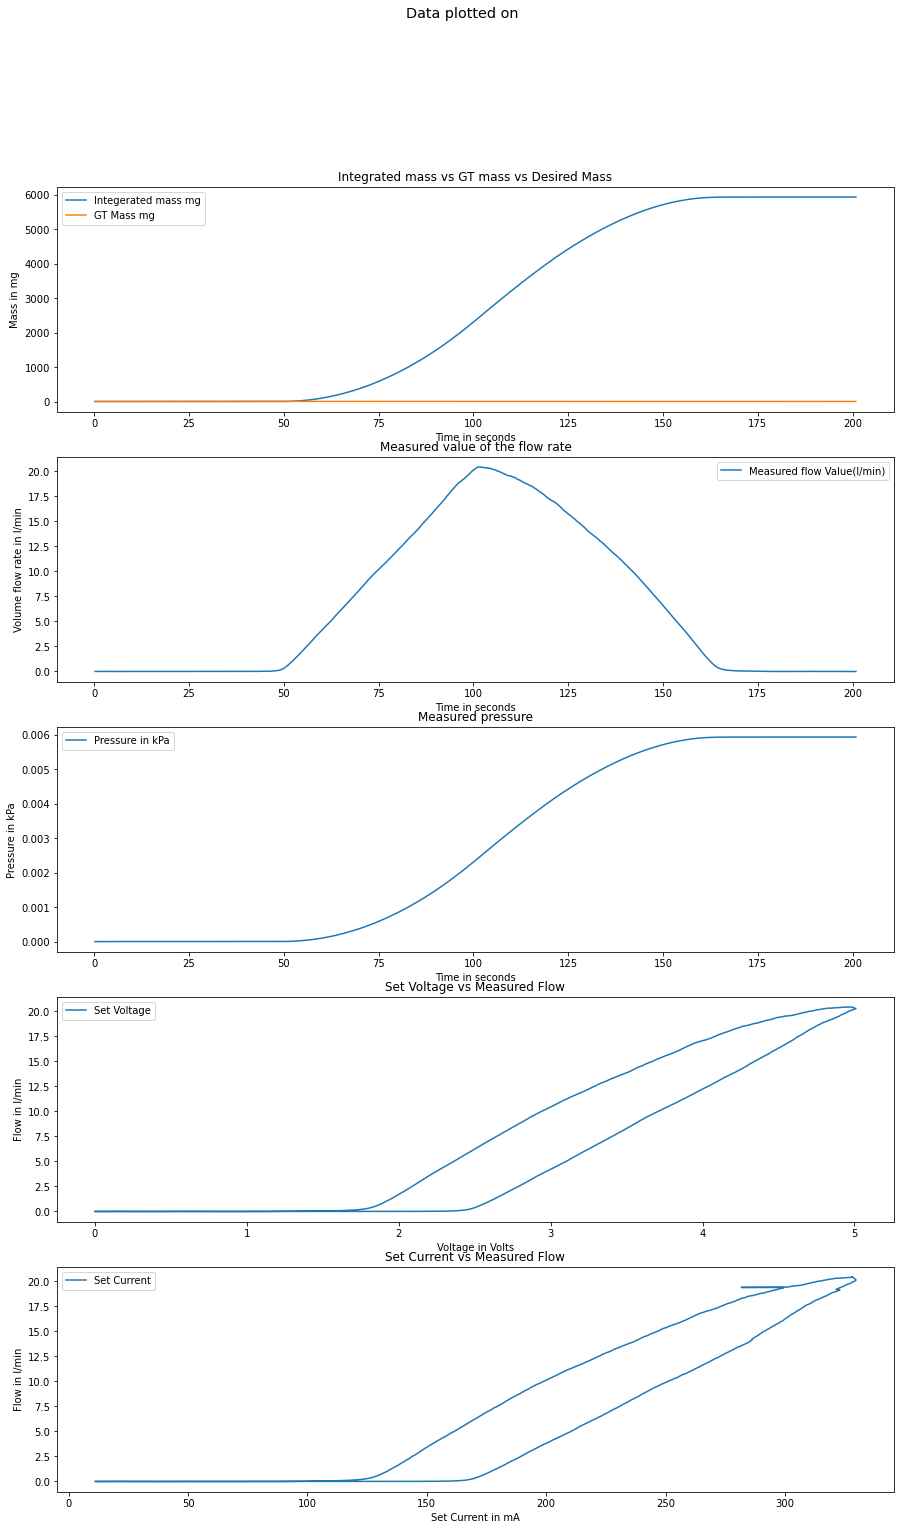

Flow starts at this voltage:  2.299999999999995


In [5]:
file_path_name = "./Data_from_PropValves/Kelly/Inflation/Charectorise_Kelly_3bar.csv"

plot_csv(file_path_name, 0.5)

Data from time delay of 0.5  s




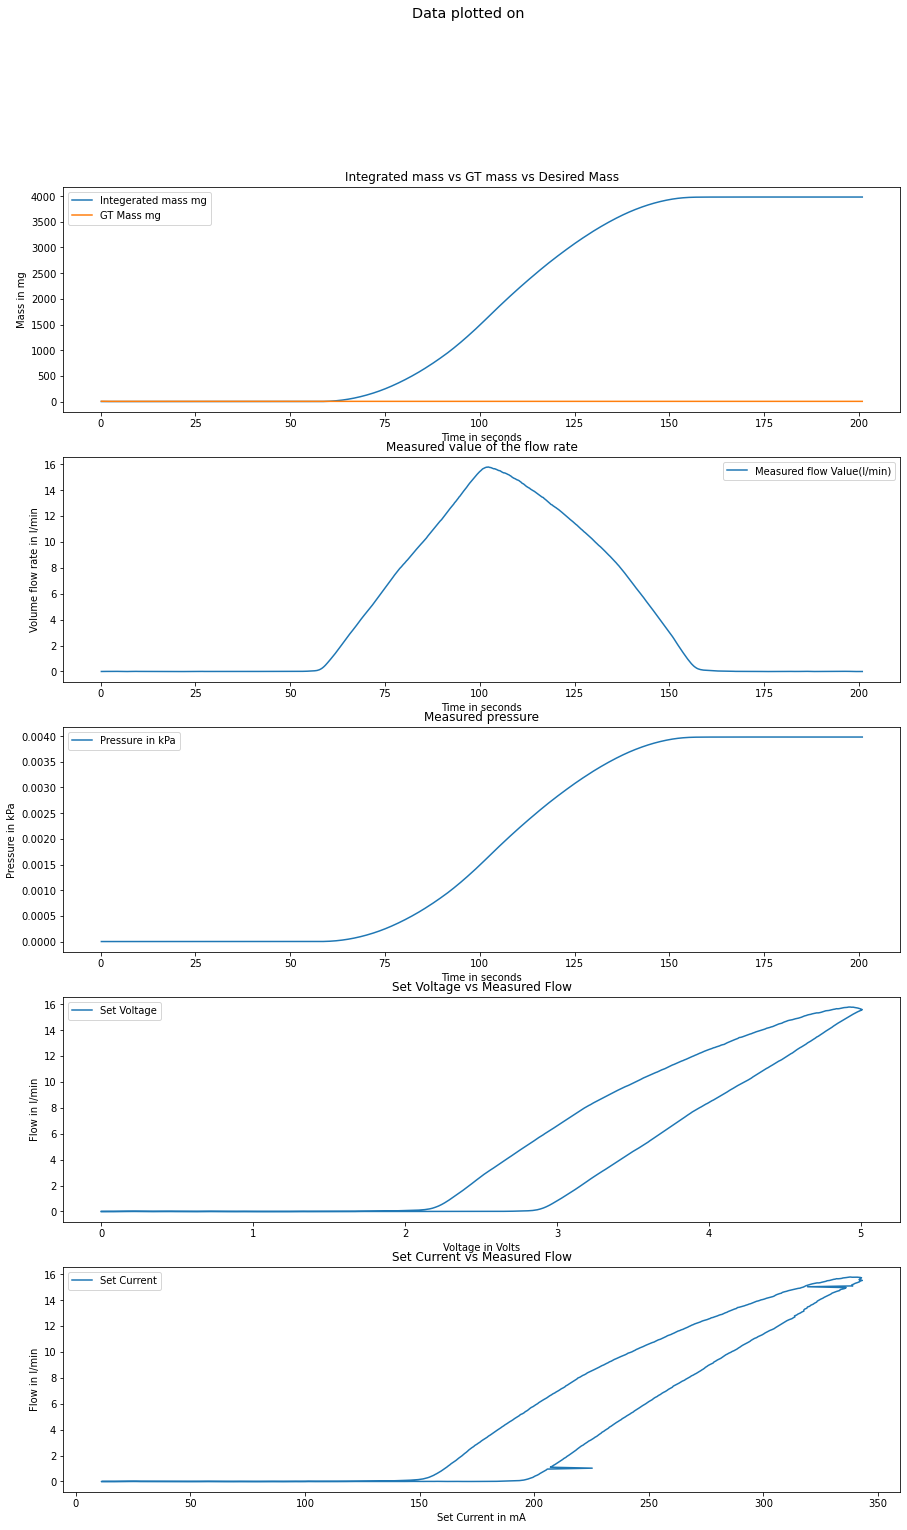

Flow starts at this voltage:  2.719999999999986


In [6]:
file_path_name = "./Data_from_PropValves/Kelly/Inflation/Charectorise_Kelly_2.5bar.csv"

plot_csv(file_path_name, 0.5)

Data from time delay of 0.5  s




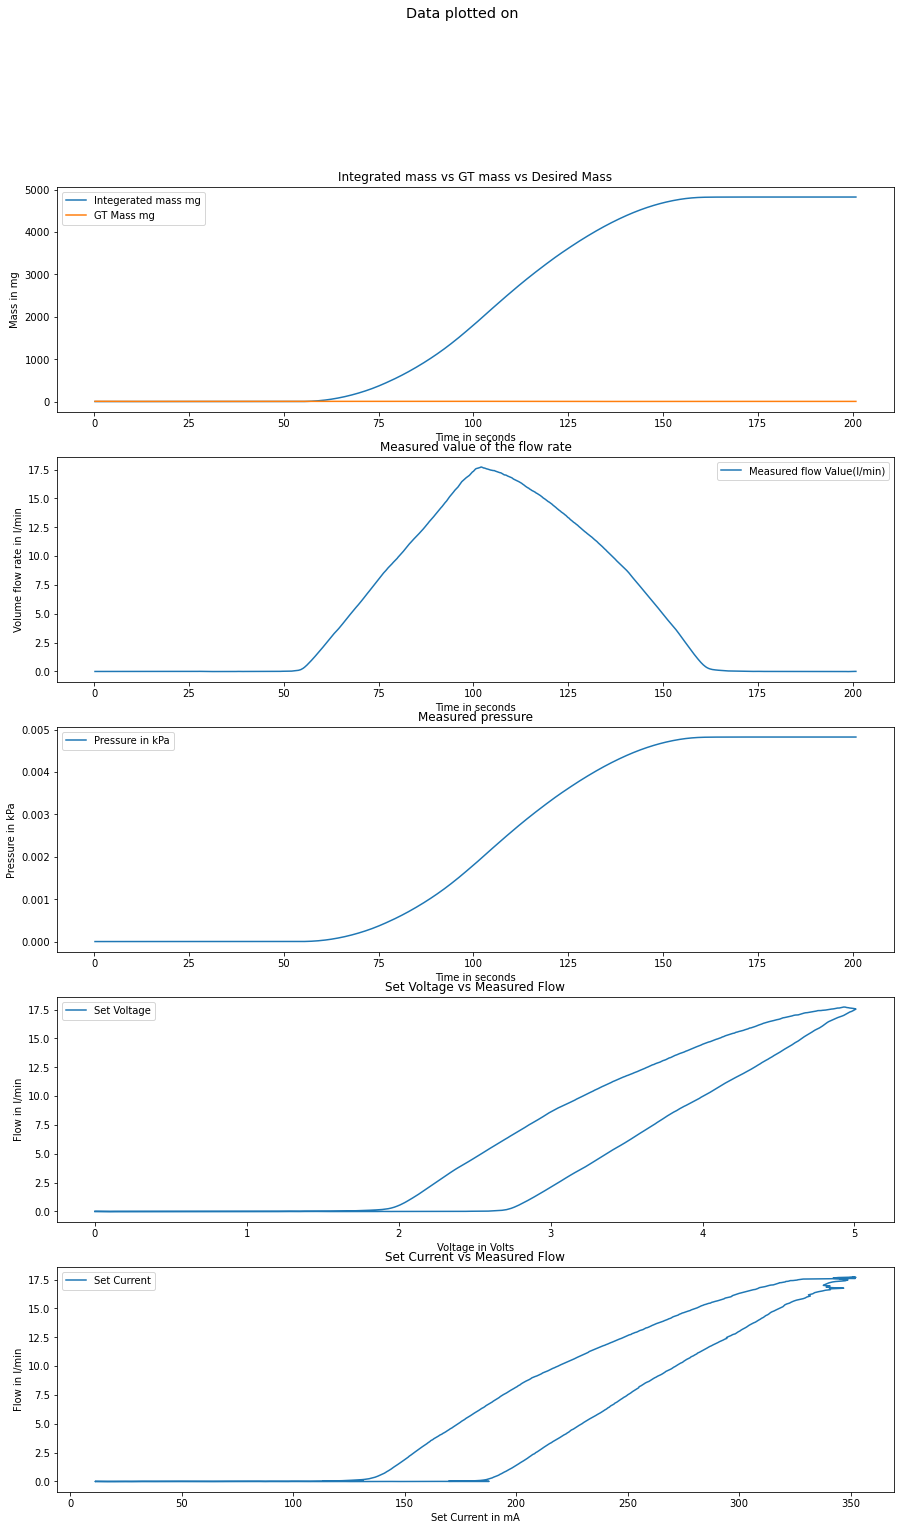

Flow starts at this voltage:  2.579999999999989


In [7]:
file_path_name = "./Data_from_PropValves/Kelly/Inflation/Charectorise_Kelly_2.75bar.csv"

plot_csv(file_path_name, 0.5)

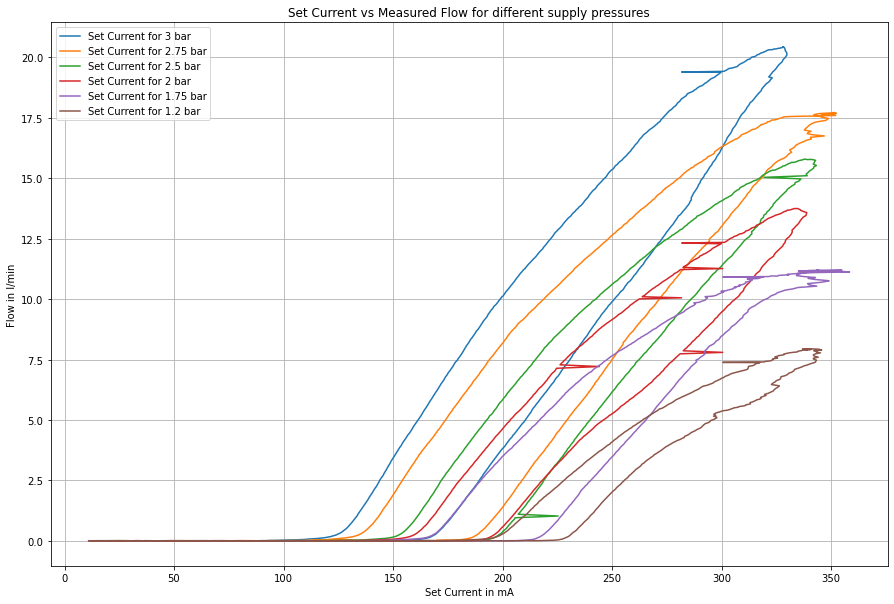

In [8]:
file_path_suffixes = ["3", "2.75", "2.5", "2", "1.75", "1.2"]
main_file_path = "./Data_from_PropValves/Kelly/Inflation/Charectorise_Kelly_"
header_names = ['Time', 'Actual flow Value' , 'Set Voltage', 'Pressure', 'Mass', 'Ground Truth Mass', 'Sense Current']
plt.figure(figsize=(15,10))
for file_path_suffix in file_path_suffixes:
    file_path = main_file_path + file_path_suffix + "bar.csv"
    df = pd.read_csv(file_path, names = header_names)
    data = df.to_numpy() 
    plt.plot(data[:,-1]*1000, data[:,1], label = str("Set Current for " + file_path_suffix + " bar"))

plt.grid()
plt.xlabel("Set Current in mA")
plt.ylabel("Flow in l/min")
plt.title("Set Current vs Measured Flow for different supply pressures")
plt.legend() 
plt.show()

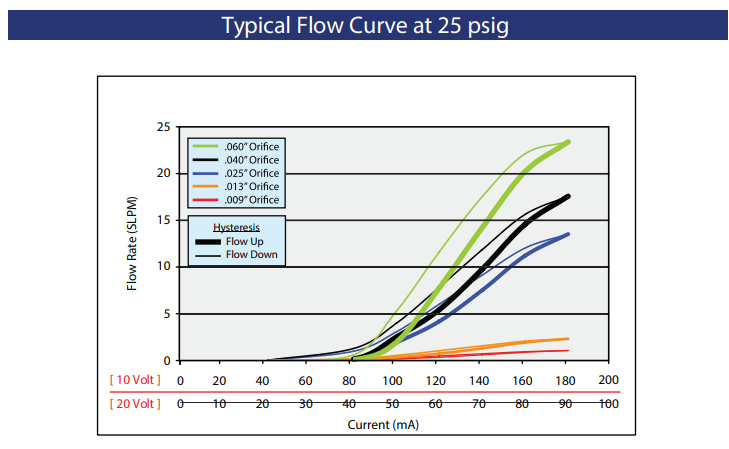

## Discussion: 
Please note the **.025"** orifice graph in the data sheet and compare with the **1.75 bar (~ 25 psig)** line in the plot obtained from sensor measurements. Assuming that the current required is double since the power consumed is constant for both the 0-5 V and 0-10 V valve. The flow charectoristics match pretty well for the flow up part and the flow down.

**For example:** During flow up the actual flow crosses 10 l/min at around **285 mA** and 5 l/min at around **225 mA** while in the datasheet it is around 145 mA and 115 mA respectively for the same two flows for 0-10 V which translated for a 0-5 V valve become double i.e **290 mA** and **230 mA**This is very close to the measured values considering the errors in setting the pressure manually in the compressor.

During flow down the actual flow crosses 10 l/min at around **320 mA** and 5 l/min at around **270 mA** while in the datasheet it is around 157 mA and 130 mA respectively for the same two flows for 0-10 V which translated for a 0-5 V valve become double i.e **315 mA** and **260 mA**. This is very close to the measured values considering the errors in setting the pressure manually in the compressor. But under 2.5 l/min the similarity is reduced.

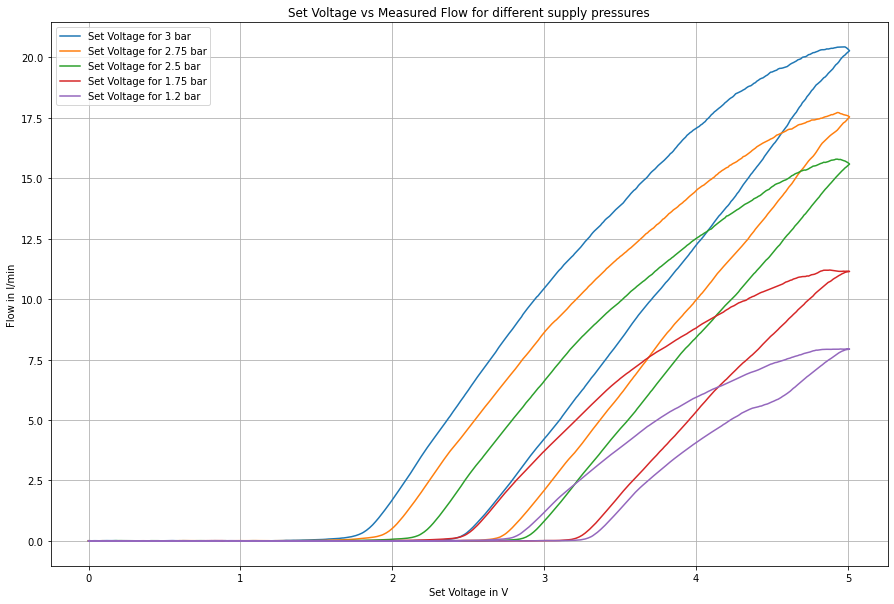

In [9]:
file_path_suffixes = ["3", "2.75", "2.5",  "1.75", "1.2"]
main_file_path = "./Data_from_PropValves/Kelly/Inflation/Charectorise_Kelly_"
header_names = ['Time', 'Actual flow Value' , 'Set Voltage', 'Pressure', 'Mass', 'Ground Truth Mass', 'Sense Current']
flow_start_voltages =[]

plt.figure(figsize=(15,10))
for file_path_suffix in file_path_suffixes:
    file_path = main_file_path + file_path_suffix + "bar.csv"
    df = pd.read_csv(file_path, names = header_names)
    data = df.to_numpy() 
    plt.plot(data[:,2], data[:,1], label = str("Set Voltage for " + file_path_suffix + " bar"))
    flow_indexes = np.where(data[:,1]>0.02)
    flow_start_voltages.append(data[flow_indexes[0][0],2])

plt.grid()
plt.xlabel("Set Voltage in V")
plt.ylabel("Flow in l/min")
plt.title("Set Voltage vs Measured Flow for different supply pressures")
plt.legend() 
plt.show()

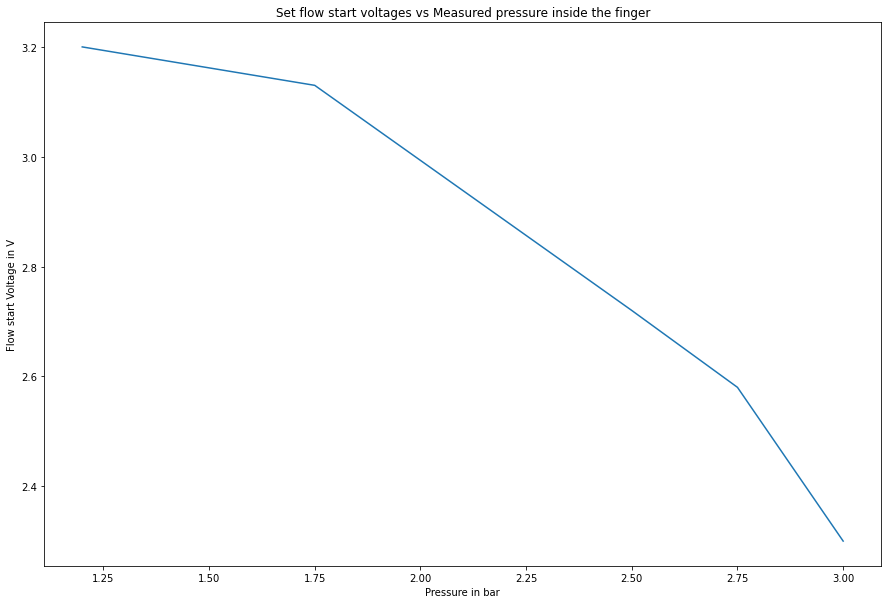

In [10]:
diff_pressures = [3,2.75,2.5,1.75,1.2] # 2 bar discarded as an outlier
plt.figure(figsize=(15,10))
plt.plot(diff_pressures , flow_start_voltages)
plt.xlabel("Pressure in bar")
plt.ylabel("Flow start Voltage in V")
plt.title("Set flow start voltages vs Measured pressure inside the finger")
plt.show()

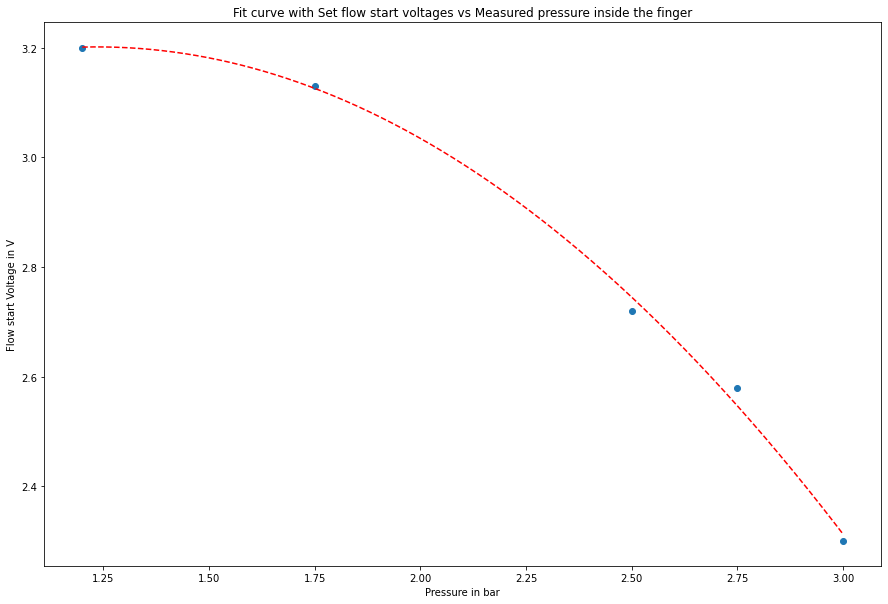

Coefficients of the fit:  [ 0.70487578 -0.28534515  2.76591885]


In [11]:
def obj_func(x, a, b, c):
    return a * x + b * x**2 + c



popt, _ = curve_fit(obj_func, diff_pressures, flow_start_voltages)

plt.figure(figsize=(15,10))
a, b, c = popt
# plot input vs output
x = diff_pressures
y = flow_start_voltages
plt.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 0.001)
# calculate the output for the range
y_line = obj_func(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.xlabel("Pressure in bar")
plt.ylabel("Flow start Voltage in V")
plt.title("Fit curve with Set flow start voltages vs Measured pressure inside the finger")
plt.show()

print("Coefficients of the fit: ",popt)

In [86]:
delta_pressures = [x - diff_pressures[i - 1] for i, x in enumerate(diff_pressures)][1:]
delta_flow_start_voltages = [x - flow_start_voltages[i-1] for i,x in enumerate(flow_start_voltages)][1:]
print(delta_flow_start_voltages, delta_pressures)

[0.27999999999999403, 0.13999999999999702, 0.4099999999999908, 0.0699999999999994] [-0.25, -0.25, -0.75, -0.55]


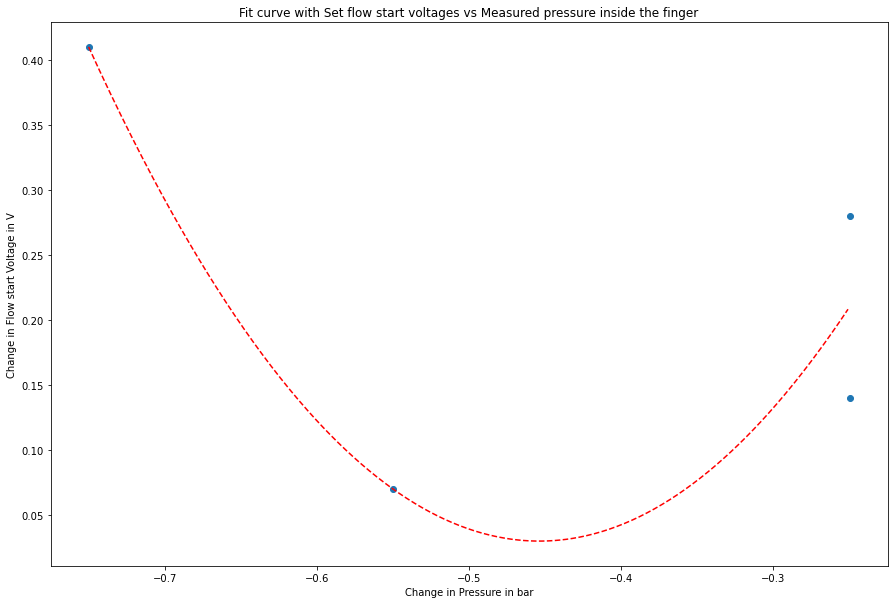

Coefficients of the fit:  [3.93333333 4.33333333 0.9225    ]


In [18]:
popt1, _ = curve_fit(obj_func, delta_pressures, delta_flow_start_voltages)


plt.figure(figsize=(15,10))
a, b, c = popt1
# plot input vs output
x = delta_pressures
y = delta_flow_start_voltages
plt.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 0.001)
# calculate the output for the range
y_line = obj_func(x_line, a, b, c)

# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.xlabel("Change in Pressure in bar")
plt.ylabel("Change in Flow start Voltage in V")
plt.title("Fit curve with Set flow start voltages vs Measured pressure inside the finger")
plt.show()

print("Coefficients of the fit: ",popt1)

**Problem**
Given flow rate and pressure find the voltage.

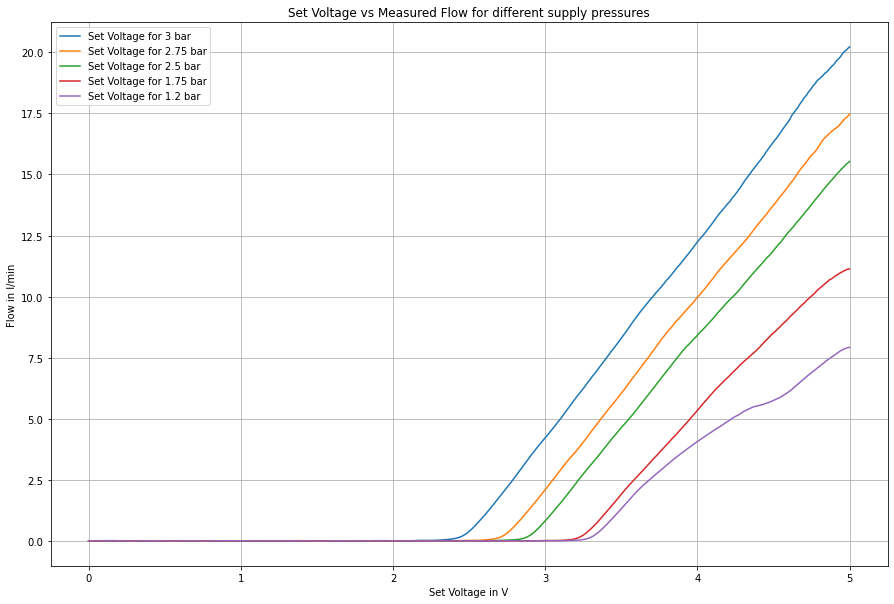

In [21]:
file_path_suffixes = ["3", "2.75", "2.5",  "1.75", "1.2"]
main_file_path = "./Data_from_PropValves/Kelly/Inflation/Charectorise_Kelly_"
header_names = ['Time', 'Actual flow Value' , 'Set Voltage', 'Pressure', 'Mass', 'Ground Truth Mass', 'Sense Current']
flow_start_voltages =[]

plt.figure(figsize=(15,10))
for file_path_suffix in file_path_suffixes:
    file_path = main_file_path + file_path_suffix + "bar.csv"
    df = pd.read_csv(file_path, names = header_names)
    data = df.to_numpy() 
    plt.plot(data[0:np.argmax(data[:,2]),2], data[0:np.argmax(data[:,2]),1], label = str("Set Voltage for " + file_path_suffix + " bar"))
    flow_indexes = np.where(data[:,1]>0.02)
    flow_start_voltages.append(data[flow_indexes[0][0],2])

plt.grid()
plt.xlabel("Set Voltage in V")
plt.ylabel("Flow in l/min")
plt.title("Set Voltage vs Measured Flow for different supply pressures")
plt.legend() 
plt.show()

In [108]:
flows = [2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5]


file_path_suffixes = ["3", "2.75", "2.5",  "1.75", "1.2"]
main_file_path = "./Data_from_PropValves/Kelly/Inflation/Charectorise_Kelly_"
header_names = ['Time', 'Actual flow Value' , 'Set Voltage', 'Pressure', 'Mass', 'Ground Truth Mass', 'Sense Current']

flow_pressure_voltages = np.empty((len(file_path_suffixes),len(flows)))
delta_pressures_different_flow = np.empty((len(file_path_suffixes),len(flows)))
delta_flow_voltages_for_different_pressures = np.empty((len(file_path_suffixes)-1,len(flows)))

for i,file_path_suffix in enumerate(file_path_suffixes):
    file_path = main_file_path + file_path_suffix + "bar.csv"
    df = pd.read_csv(file_path, names = header_names)
    data = df.to_numpy() 
    
    for j,flow in enumerate(flows):
        result1 = ((data[:,1] - flow) >= 0)
        result2 = ((data[:,1] - flow) <= 0.2)

        result = np.logical_and(result1,result2)

        idx = result.tolist().index(True)
        flow_pressure_voltages[i,j] = data[idx,2]
    

for l in range(len(flows)):
    array_to_list = flow_pressure_voltages[:,j].tolist()
    delta_flow_voltages_for_different_pressures[:,j] = ([x - array_to_list[k-1] for k,x in enumerate(array_to_list)][1:])
    
    
print(flow_pressure_voltages)



mean_voltage_offset = np.mean(delta_flow_voltages_for_different_pressures,1)

print(mean_voltage_offset)

[[2.73 2.79 2.85 2.91 2.98 3.04 3.11 3.16]
 [2.99 3.06 3.12 3.18 3.25 3.31 3.37 3.44]
 [3.16 3.22 3.29 3.36 3.42 3.49 3.56 3.62]
 [3.52 3.59 3.66 3.74 3.81 3.89 3.96 4.03]
 [3.6  3.69 3.78 3.88 3.99 4.11 4.23 4.39]]
[0.035   0.0225  0.05125 0.045  ]


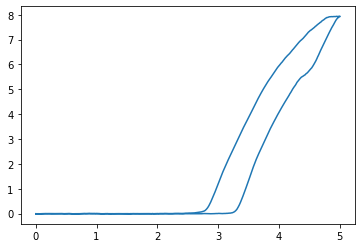

In [30]:
plt.plot(data[:,2],data[:,1])
plt.show()